This exercise will require you to pull some data from https://data.nasdaq.com/ (formerly Quandl API).

As a first step, you will need to register a free account on the https://data.nasdaq.com/ website.

After you register, you will be provided with a unique API key, that you should store:

*Note*: Use a `.env` file and put your key in there and `python-dotenv` to access it in this notebook. 

The code below uses a key that was used when generating this project but has since been deleted. Never submit your keys to source control. There is a `.env-example` file in this repository to illusrtate what you need. Copy that to a file called `.env` and use your own api key in that `.env` file. Make sure you also have a `.gitignore` file with a line for `.env` added to it. 

The standard Python gitignore is [here](https://github.com/github/gitignore/blob/master/Python.gitignore) you can just copy that. 

In [1]:
# get api key from your .env file
import os
from dotenv import load_dotenv

load_dotenv()
API_KEY = os.getenv('NASDAQ_API_KEY')

print(API_KEY)

M3jzwrzN-adV9X9ZNxTo


Nasdaq Data has a large number of data sources, but, unfortunately, most of them require a Premium subscription. Still, there are also a good number of free datasets.

For this mini project, we will focus on equities data from the Frankfurt Stock Exhange (FSE), which is available for free. We'll try and analyze the stock prices of a company called Carl Zeiss Meditec, which manufactures tools for eye examinations, as well as medical lasers for laser eye surgery: https://www.zeiss.com/meditec/int/home.html. The company is listed under the stock ticker AFX_X.

You can find the detailed Nasdaq Data API instructions here: https://docs.data.nasdaq.com/docs/in-depth-usage

While there is a dedicated Python package for connecting to the Nasdaq API, we would prefer that you use the *requests* package, which can be easily downloaded using *pip* or *conda*. You can find the documentation for the package here: http://docs.python-requests.org/en/master/ 

Finally, apart from the *requests* package, you are encouraged to not use any third party Python packages, such as *pandas*, and instead focus on what's available in the Python Standard Library (the *collections* module might come in handy: https://pymotw.com/3/collections/).
Also, since you won't have access to DataFrames, you are encouraged to us Python's native data structures - preferably dictionaries, though some questions can also be answered using lists.
You can read more on these data structures here: https://docs.python.org/3/tutorial/datastructures.html

Keep in mind that the JSON responses you will be getting from the API map almost one-to-one to Python's dictionaries. Unfortunately, they can be very nested, so make sure you read up on indexing dictionaries in the documentation provided above.

In [2]:
# First, import the relevant modules
import requests
import json

Note: API's can change a bit with each version, for this exercise it is reccomended to use the nasdaq api at `https://data.nasdaq.com/api/v3/`. This is the same api as what used to be quandl so `https://www.quandl.com/api/v3/` should work too.

Hint: We are looking for the `AFX_X` data on the `datasets/FSE/` dataset.

In [3]:
# Now, call the Nasdaq API and pull out a small sample of the data (only one day) to get a glimpse
# into the JSON structure that will be returne

url = 'https://data.nasdaq.com/api/v3/datasets/FSE/AFX_X'
#url = 'https://www.quandl.com/api/v3/datasets/FSE/AFX_X'

optstr = '?start_date=2020-12-01'
apikey = 'api_key='+API_KEY
res = requests.get(url+optstr+'&'+apikey)

In [4]:
res.text

'{"dataset":{"id":10095370,"dataset_code":"AFX_X","database_code":"FSE","name":"Carl Zeiss Meditec (AFX_X)","description":"Stock Prices for Carl Zeiss Meditec (2020-11-02) from the Frankfurt Stock Exchange.\\u003cbr\\u003e\\u003cbr\\u003eTrading System: Xetra\\u003cbr\\u003e\\u003cbr\\u003eISIN: DE0005313704","refreshed_at":"2020-12-01T14:48:09.907Z","newest_available_date":"2020-12-01","oldest_available_date":"2000-06-07","column_names":["Date","Open","High","Low","Close","Change","Traded Volume","Turnover","Last Price of the Day","Daily Traded Units","Daily Turnover"],"frequency":"daily","type":"Time Series","premium":false,"limit":null,"transform":null,"column_index":null,"start_date":"2020-12-01","end_date":"2020-12-01","data":[["2020-12-01",112.2,112.2,111.5,112.0,null,51.0,5703.0,null,null,null]],"collapse":null,"order":null,"database_id":6129}}'

In [5]:
# Inspect the JSON structure of the object you created, and take note of how nested it is,
# as well as the overall structure

#res_js = json.loads(res.text)
res_js = res.json()
res_js

{'dataset': {'id': 10095370,
  'dataset_code': 'AFX_X',
  'database_code': 'FSE',
  'name': 'Carl Zeiss Meditec (AFX_X)',
  'description': 'Stock Prices for Carl Zeiss Meditec (2020-11-02) from the Frankfurt Stock Exchange.<br><br>Trading System: Xetra<br><br>ISIN: DE0005313704',
  'refreshed_at': '2020-12-01T14:48:09.907Z',
  'newest_available_date': '2020-12-01',
  'oldest_available_date': '2000-06-07',
  'column_names': ['Date',
   'Open',
   'High',
   'Low',
   'Close',
   'Change',
   'Traded Volume',
   'Turnover',
   'Last Price of the Day',
   'Daily Traded Units',
   'Daily Turnover'],
  'frequency': 'daily',
  'type': 'Time Series',
  'premium': False,
  'limit': None,
  'transform': None,
  'column_index': None,
  'start_date': '2020-12-01',
  'end_date': '2020-12-01',
  'data': [['2020-12-01',
    112.2,
    112.2,
    111.5,
    112.0,
    None,
    51.0,
    5703.0,
    None,
    None,
    None]],
  'collapse': None,
  'order': None,
  'database_id': 6129}}

These are your tasks for this mini project:

1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).
2. Convert the returned JSON object into a Python dictionary.
3. Calculate what the highest and lowest opening prices were for the stock in this period.
4. What was the largest change in any one day (based on High and Low price)?
5. What was the largest change between any two days (based on Closing Price)?
6. What was the average daily trading volume during this year?
7. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

### 1. Collect data from the Franfurt Stock Exchange, for the ticker AFX_X, for the whole year 2017 (keep in mind that the date format is YYYY-MM-DD).

In [6]:
# url for data collection
url = 'https://data.nasdaq.com/api/v3/datasets/FSE/AFX_X'

# option for the query
optstr = '?start_date=2017-01-01&end_date=2017-12-31'

# string for api_key
apikey = 'api_key='+API_KEY

# create response using requests package
res = requests.get(url+optstr+'&'+apikey)

#print(res.text)

### 2. Convert the returned JSON object into a Python dictionary.

In [7]:
# convert the text to json
res_js = res.json() 

print("type of res_json: ", type(res_js))

# check the data keys
print(res_js['dataset'].keys())

type of res_json:  <class 'dict'>
dict_keys(['id', 'dataset_code', 'database_code', 'name', 'description', 'refreshed_at', 'newest_available_date', 'oldest_available_date', 'column_names', 'frequency', 'type', 'premium', 'limit', 'transform', 'column_index', 'start_date', 'end_date', 'data', 'collapse', 'order', 'database_id'])


In [8]:
""" check the sample data """

res_js['dataset']['data'][0:3]

[['2017-12-29',
  51.76,
  51.94,
  51.45,
  51.76,
  None,
  34640.0,
  1792304.0,
  None,
  None,
  None],
 ['2017-12-28',
  51.65,
  51.82,
  51.43,
  51.6,
  None,
  40660.0,
  2099024.0,
  None,
  None,
  None],
 ['2017-12-27',
  51.45,
  51.89,
  50.76,
  51.82,
  None,
  57452.0,
  2957018.0,
  None,
  None,
  None]]

In [9]:
""" re-arrange the data 
    Currently, the data was stored in wide-format. 
    For the sake of covenience, it will be modifed to long-format in this process """

columns = res_js['dataset']['column_names']    # column names 

res_long = {} # initialize the dictionary for the long-format

for i, icol in enumerate(columns):
    dummy = []  # initialize the list array for each attribute
    
    # the date was stored reversely in date, so it will be reversed in the loop below for re-ordering the date in ascending order
    for j in range(len(res_js['dataset']['data'])-1,0,-1):  
        dummy.append(res_js['dataset']['data'][j][i])
    res_long[icol] = dummy
    
nData = len(res_long['Date'])   # length of the data

print(res_long.keys())
print('\n')
print("data length: ", nData)

dict_keys(['Date', 'Open', 'High', 'Low', 'Close', 'Change', 'Traded Volume', 'Turnover', 'Last Price of the Day', 'Daily Traded Units', 'Daily Turnover'])


data length:  254


In [10]:
""" Check the first data if there is any None value """
print(res_js['dataset']['data'][-1])

['2017-01-02', 34.99, 35.94, 34.99, 35.8, None, 44700.0, 1590561.0, None, None, None]


### 3. Calculate what the highest and lowest opening prices were for the stock in this period.

In [11]:
# Initialize variables
hg_open = lw_open = res_long['Open'][0]   # highest & lowest opening prices
hg_open_ind = 0   # index for the highest opening price
lw_open_ind = 0   # index for the lowest opening price

# loop for find the highest & lowest opening prices
for ind, iopen in enumerate(res_long['Open']):
    if (iopen is not None):
        if (iopen > hg_open):
            hg_open = iopen
            hg_open_ind = ind
        elif (iopen < lw_open):
            lw_open = iopen
            lw_open_ind = ind

print("highest opening price: %f at %s"%(hg_open, res_long['Date'][hg_open_ind]))
print("lowest  opening price: %f at %s"%(lw_open, res_long['Date'][lw_open_ind]))

highest opening price: 53.110000 at 2017-12-14
lowest  opening price: 34.000000 at 2017-01-24


Text(0, 0.5, 'Opening Price')

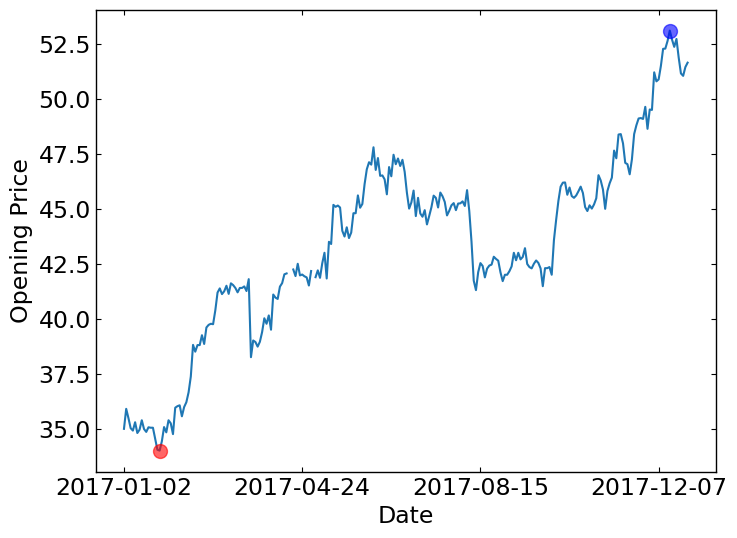

In [12]:
""" Quick check by plot """
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

%matplotlib inline

fig,ax = plt.subplots()

ax.plot(res_long['Date'],res_long['Open'])
ax.plot(res_long['Date'][hg_open_ind],hg_open,"o",color='blue',ms=10,alpha=0.6)
ax.plot(res_long['Date'][lw_open_ind],lw_open,"o",color='red',ms=10,alpha=0.6)
ax.xaxis.set_major_locator(MaxNLocator(4)) 
ax.set_xlabel('Date')
ax.set_ylabel('Opening Price')

### 4. What was the largest change in any one day (based on High and Low price)?

In [13]:
# Initialize variables
max_chg = 0.     # largest change in a day
max_chg_ind = 0  # index for the largest change in a day
chg = []         # list for change in a day (High - Low)

# loop for finding the largest change in a day
for ind in range(nData):
    
    if ((res_long['High'][ind] is not None) and (res_long['Low'][ind] is not None)):
        chg_day = res_long['High'][ind] - res_long['Low'][ind]
        
        if (chg_day > max_chg):
            max_chg = chg_day
            max_chg_ind = ind
        
        chg.append(chg_day)
    else: chg.append(None)

print("largest change in a day: %f at %s"%(max_chg, res_long['Date'][max_chg_ind]))

largest change in a day: 2.810000 at 2017-05-11


Text(0, 0.5, 'Change in a day')

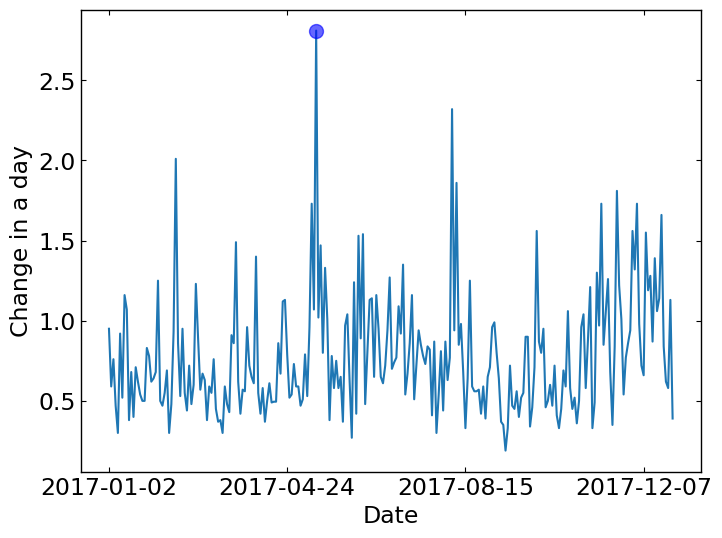

In [14]:
""" Quick check by plot """
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

%matplotlib inline

fig,ax = plt.subplots()

ax.plot(res_long['Date'],chg)
ax.plot(res_long['Date'][max_chg_ind],max_chg,"o",color='blue',ms=10,alpha=0.6)
ax.xaxis.set_major_locator(MaxNLocator(4)) 
ax.set_xlabel('Date')
ax.set_ylabel('Change in a day')

### 5. What was the largest change between any two days (based on Closing Price)?

In [15]:
# Initialize Variables
max_chg2 = 0.      # largest chagne between any two days
max_chg2_ind = 0   # index for the largest change between any two days 
chg2 = [0]         # list for change (note that it will be 0 initially as the loop will start at ind=1 not 0)

# loop for finding the largest change between any two days
for ind in range(1,nData):
    
    if ((res_long['Close'][ind] is not None) and (res_long['Close'][ind-1] is not None)):
        chg_2day = abs(res_long['Close'][ind] - res_long['Close'][ind-1])
        
        if (chg_2day > max_chg2):
            max_chg2 = chg_2day
            max_chg2_ind = ind
        
        chg2.append(chg_2day)
    else: chg2.append(None)

print("largest change in a day: %f at %s"%(max_chg2, res_long['Date'][max_chg2_ind]))

largest change in a day: 2.560000 at 2017-08-09


Text(0, 0.5, 'Change in two days')

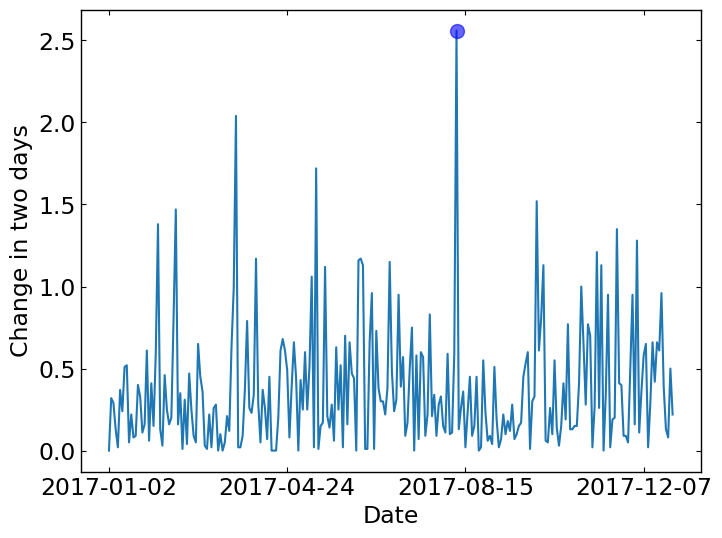

In [16]:
""" Quick check by plot """
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

%matplotlib inline

fig,ax = plt.subplots()

ax.plot(res_long['Date'],chg2)
ax.plot(res_long['Date'][max_chg2_ind],max_chg2,"o",color='blue',ms=10,alpha=0.6)
ax.xaxis.set_major_locator(MaxNLocator(4)) 
ax.set_xlabel('Date')
ax.set_ylabel('Change in two days')

### 6. What was the average daily trading volume during this year?

In [17]:
""" Check if there is None Values in "Traded Volume" Column """
iflag = True
for ind, itrade in enumerate(res_long['Traded Volume']):
    if (itrade is None):
        print("Traded Volume is None at %d"%ind)
        iflag = False
        break
if (iflag): print("No None Values!!! Go Ahead!")

No None Values!!! Go Ahead!


In [18]:
""" calculate average value of daily trading volume """

ave_trade = sum(res_long['Traded Volume'])/nData

print("Average daily trading volume during 2017: %f"%ave_trade)

Average daily trading volume during 2017: 89338.842520


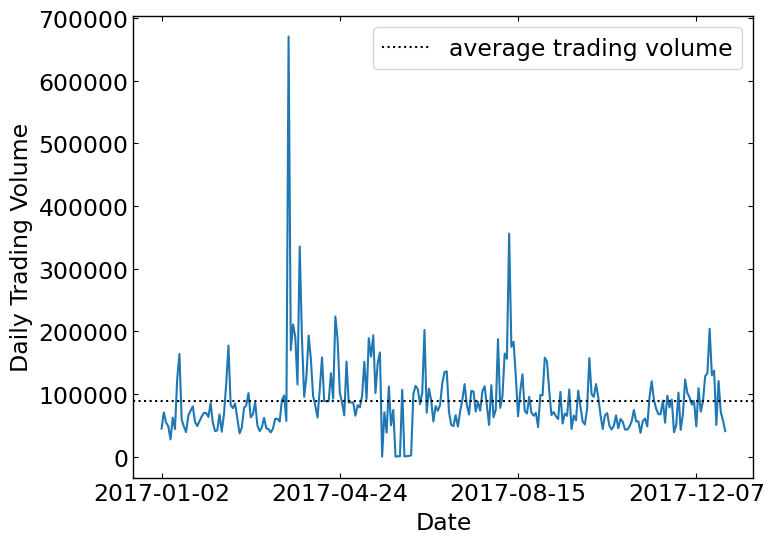

In [19]:
""" Quick check by plot """
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

%matplotlib inline

fig,ax = plt.subplots()

ax.plot(res_long['Date'],res_long['Traded Volume'])
ax.axhline(y=ave_trade,linestyle=':',color='k', label='average trading volume')
ax.xaxis.set_major_locator(MaxNLocator(4)) 
ax.set_xlabel('Date')
ax.set_ylabel('Daily Trading Volume')
ax.legend(loc='upper right')

### 7. (Optional) What was the median trading volume during this year. (Note: you may need to implement your own function for calculating the median.)

In [20]:
""" calculate median value of daily trading volume """

# sort daily-trading array
sort_trade = sorted(res_long['Traded Volume'])

# find median value
med_trade = sort_trade[nData//2]

print("Median daily trading volume during 2017: %f"%med_trade)

Median daily trading volume during 2017: 76600.000000


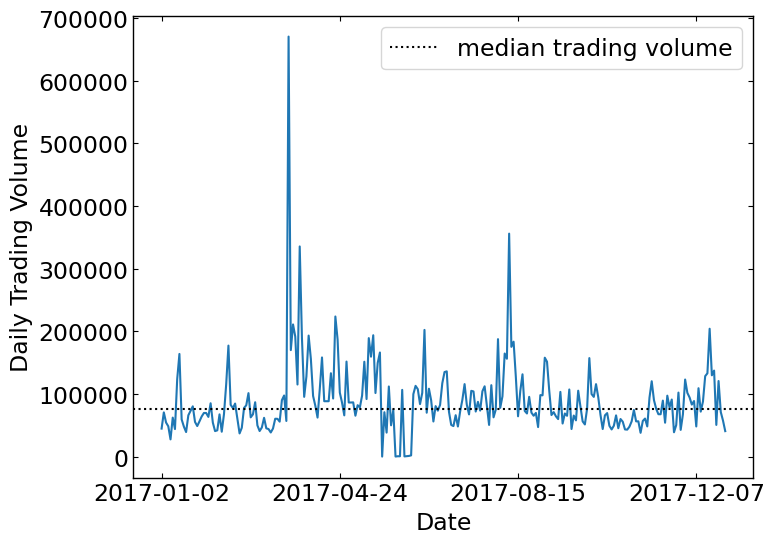

In [21]:
""" Quick check by plot """
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

%matplotlib inline

fig,ax = plt.subplots()

ax.plot(res_long['Date'],res_long['Traded Volume'])
ax.axhline(y=med_trade,linestyle=':',color='k', label='median trading volume')
ax.xaxis.set_major_locator(MaxNLocator(4)) 
ax.set_xlabel('Date')
ax.set_ylabel('Daily Trading Volume')
ax.legend(loc='upper right')